## Importing Libraries


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data preprocessing


### Training image preprocessing


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    format="tf",
    verbose=True,
) # Generates a dataset from image files in a directory.

Found 70295 files belonging to 38 classes.


### validation image preprocessing


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    format="tf",
    verbose=True,
) # Generates a dataset from image files in a directory.

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)

    print(y,y.shape)
    break

tf.Tensor(
[[[[167.   153.   144.  ]
   [158.   144.   135.  ]
   [159.25 142.25 134.25]
   ...
   [181.25 168.25 160.25]
   [173.75 160.75 152.75]
   [185.   172.   164.  ]]

  [[164.75 150.75 141.75]
   [143.25 129.25 120.25]
   [160.25 143.25 135.25]
   ...
   [188.   175.   167.  ]
   [190.5  177.5  169.5 ]
   [181.25 168.25 160.25]]

  [[177.5  163.5  154.5 ]
   [154.5  140.5  131.5 ]
   [158.25 141.25 133.25]
   ...
   [187.   174.   166.  ]
   [196.75 183.75 175.75]
   [176.   163.   155.  ]]

  ...

  [[152.5  135.5  128.5 ]
   [151.   134.   127.  ]
   [140.5  123.5  116.5 ]
   ...
   [179.5  166.5  160.5 ]
   [157.25 144.25 138.25]
   [164.   151.   145.  ]]

  [[135.75 118.75 111.75]
   [155.75 138.75 131.75]
   [158.75 141.75 134.75]
   ...
   [168.   155.   149.  ]
   [172.   159.   153.  ]
   [174.5  161.5  155.5 ]]

  [[126.75 109.75 102.75]
   [145.5  128.5  121.5 ]
   [144.75 127.75 120.75]
   ...
   [165.   152.   146.  ]
   [166.75 153.75 147.75]
   [167.   154.   14

### To avoid overshooting
1 . Choose a small learning rate, default 0.001. We are taking 0.0001
2 . There may be a chance of underfitting, so increase the number of neurons
3 . Add more convolutional layers to extract more features from images. There may be a possibility that the model is unable to capture relevant features or the model is confusing due to a lack of features so feed it with more features

## Building model



In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
# # building convolutional layer

In [9]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


C:\Users\user\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters = 64,kernel_size = 3 ,padding='same',activation='relu'))
model.add(Conv2D(filters = 64,kernel_size = 3 ,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [11]:
model.add(Conv2D(filters = 128,kernel_size = 3 ,padding='same',activation='relu'))
model.add(Conv2D(filters = 128,kernel_size = 3 ,activation='relu',))
model.add(MaxPool2D(pool_size=2,strides=2))


In [12]:
model.add(Conv2D(filters = 256,kernel_size = 3 ,padding='same',activation='relu'))
model.add(Conv2D(filters = 256,kernel_size = 3 ,activation='relu',))
model.add(MaxPool2D(pool_size=2,strides=2))


In [13]:
model.add(Conv2D(filters = 512,kernel_size = 3 ,padding='same',activation='relu'))
model.add(Conv2D(filters = 512,kernel_size = 3 ,activation='relu',))
model.add(MaxPool2D(pool_size=2,strides=2))


In [14]:
model.add(Dropout(0.25)) # to avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
# Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model 

In [19]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001)
              ,loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### ModelTraining 

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=3)

Epoch 1/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1894s 860ms/step - accuracy: 0.6195 - loss: 1.2856 - val_accuracy: 0.8515 - val_loss: 0.4761
Epoch 2/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1942s 884ms/step - accuracy: 0.8661 - loss: 0.4218 - val_accuracy: 0.9089 - val_loss: 0.2780
Epoch 3/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2768s 1s/step - accuracy: 0.9195 - loss: 0.2507 - val_accuracy: 0.9359 - val_loss: 0.1996


## Model Evaluation

In [24]:
# model evalution on training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 656s 299ms/step - accuracy: 0.9592 - loss: 0.1264


In [25]:
print(train_loss,train_acc)

0.1264406442642212 0.9591578245162964


In [27]:
# model on validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 192s 349ms/step - accuracy: 0.9359 - loss: 0.1996


In [28]:
print(val_loss,val_acc)

0.19955939054489136 0.9358638525009155


## Saving Model

In [31]:
model.save("trained_model.keras")

In [34]:
training_history.history

{'accuracy': [0.6195319890975952, 0.8660644292831421, 0.9194821715354919],
 'loss': [1.2856005430221558, 0.42179545760154724, 0.2507370114326477],
 'val_accuracy': [0.8515251278877258, 0.90888911485672, 0.9358638525009155],
 'val_loss': [0.4760766625404358, 0.27799585461616516, 0.19955934584140778]}

In [35]:
# Recording History in JSON
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)
    
    

In [39]:
training_history.history['accuracy']

[0.6195319890975952, 0.8660644292831421, 0.9194821715354919]

In [41]:
training_history.history['val_accuracy']

[0.8515251278877258, 0.90888911485672, 0.9358638525009155]

### Accuracy Visulization

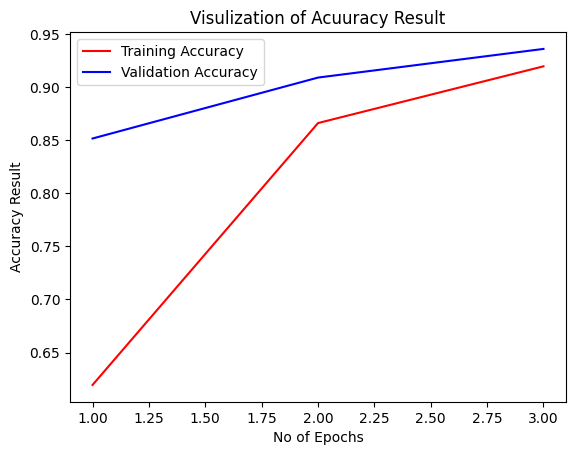

In [45]:
epochs =  [i for i in range(1,4)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visulization of Acuuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [46]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [47]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [50]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 206s 374ms/step


(array([[9.99952674e-01, 4.97110477e-07, 3.96754558e-07, ...,
         1.14896523e-10, 3.54422611e-12, 5.10489118e-09],
        [9.74188209e-01, 8.26431133e-05, 6.09893614e-05, ...,
         5.16356380e-08, 1.86085725e-08, 1.10830047e-06],
        [9.99999762e-01, 8.71152261e-10, 5.60155655e-09, ...,
         2.01555800e-13, 5.62007419e-15, 4.40389183e-11],
        ...,
        [3.06881473e-13, 4.05665863e-16, 3.01955197e-11, ...,
         1.74044806e-14, 1.51713596e-15, 1.00000000e+00],
        [1.24699293e-10, 2.20232686e-13, 3.89812849e-09, ...,
         1.09571095e-10, 2.52988250e-13, 9.99998808e-01],
        [3.43416073e-10, 2.55844929e-11, 3.70733916e-10, ...,
         1.74053397e-10, 2.98074134e-08, 9.99814570e-01]], dtype=float32),
 (17572, 38))

In [51]:
predicted_categories = tf.argmax(y_pred,axis =1)

In [52]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [53]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [54]:
Y_true = tf.argmax(true_categories,axis =1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

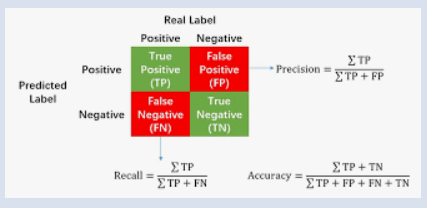

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.89      0.93       504
                                 Apple___Black_rot       1.00      0.93      0.96       497
                          Apple___Cedar_apple_rust       0.81      1.00      0.89       440
                                   Apple___healthy       0.93      0.91      0.92       502
                               Blueberry___healthy       0.90      0.97      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.93      0.95       421
                 Cherry_(including_sour)___healthy       0.90      1.00      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.94      0.88       410
                       Corn_(maize)___Common_rust_       0.99      0.95      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.95      0.

In [62]:
cn = confusion_matrix(Y_true,predicted_categories)
cn

array([[448,   0,   5, ...,   0,   0,   0],
       [  3, 463,   0, ...,   0,   0,   0],
       [  0,   0, 440, ...,   0,   0,   0],
       ...,
       [  0,   0,   4, ..., 482,   0,   0],
       [  0,   0,   0, ...,   0, 414,   0],
       [  0,   0,   2, ...,   0,   0, 469]], dtype=int64)

## Confusion Matrix Visulization

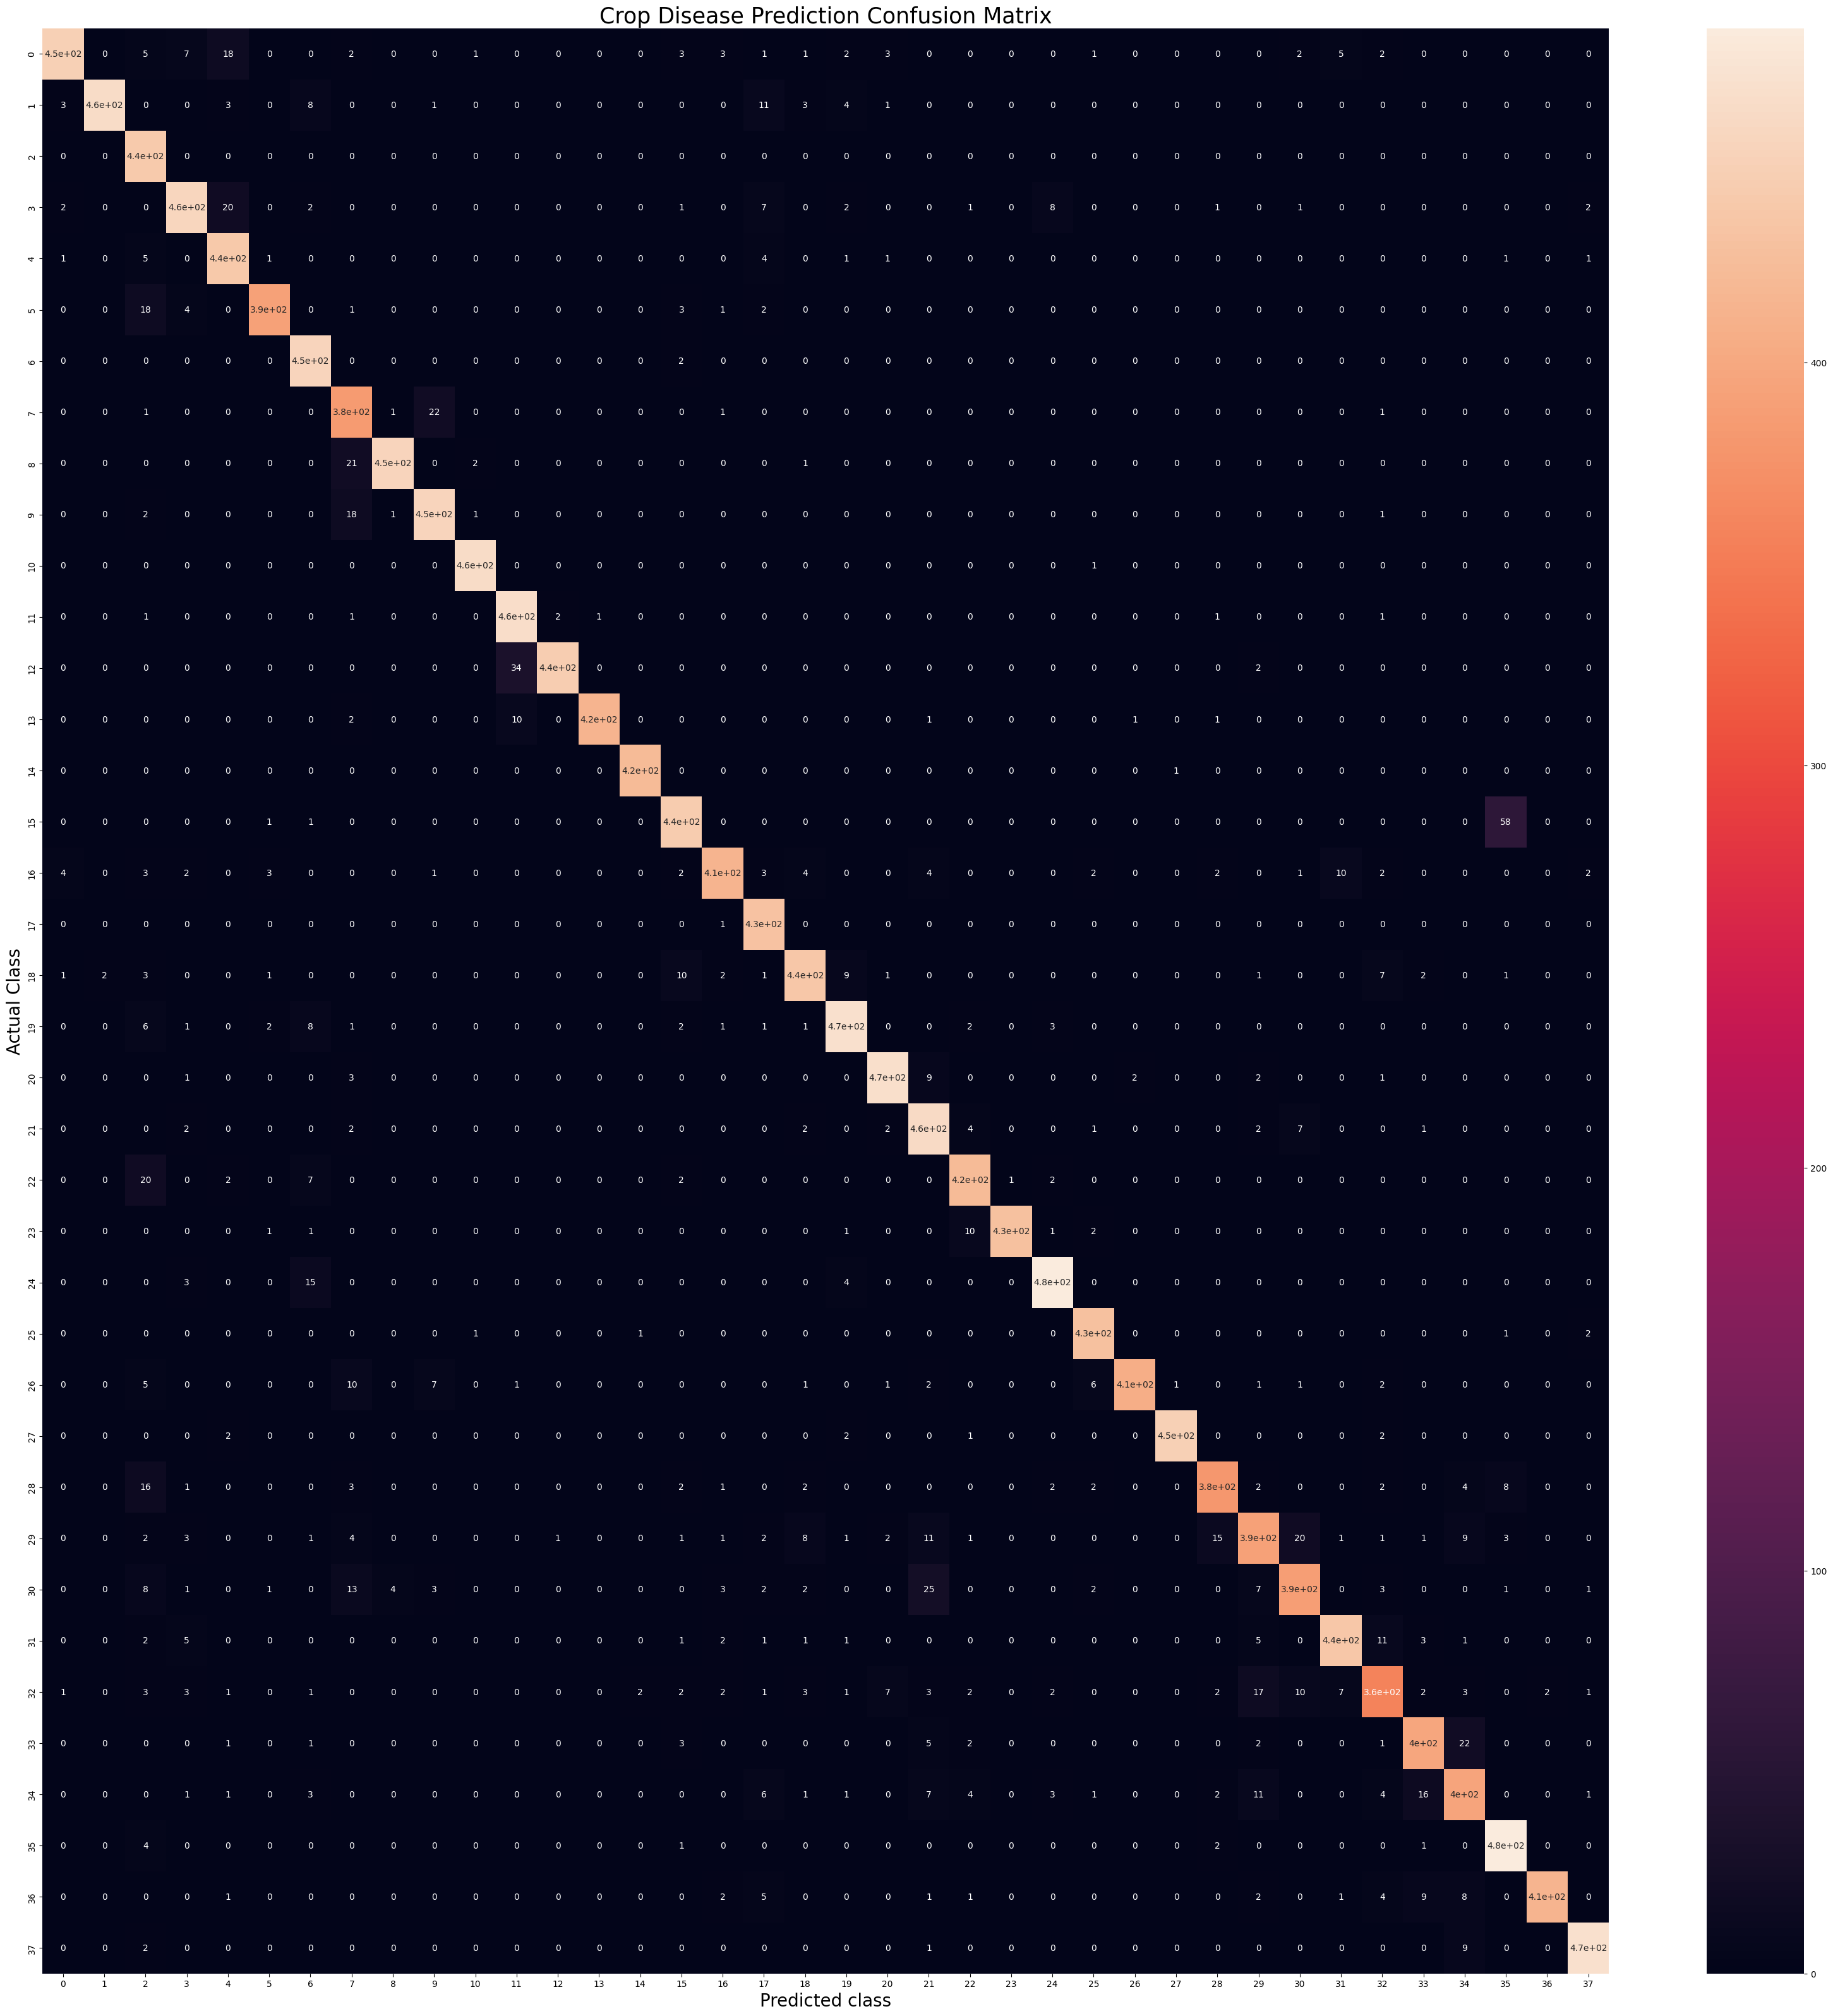

In [72]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Crop Disease Prediction Confusion Matrix",fontsize=25)
plt.show()